<a href="https://colab.research.google.com/github/Salimgereyevm/SalimgereyevM309/blob/Hometask_2/Hometask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a =np.random.random((10,3)) -0.5

print(a+0.5)

print(np.min(abs(a)+0.5, axis = 1))


[[0.86555515 0.74042501 0.54820343]
 [0.72677855 0.72202756 0.80318604]
 [0.40638402 0.73501222 0.13327694]
 [0.4900501  0.39094943 0.11919751]
 [0.26997555 0.79604366 0.93319936]
 [0.94861579 0.14228877 0.90587836]
 [0.46825072 0.55291472 0.17906441]
 [0.56064963 0.87678197 0.59661739]
 [0.22002112 0.47140381 0.92270425]
 [0.94849164 0.22744854 0.37160114]]
[0.54820343 0.72202756 0.59361598 0.5099499  0.73002445 0.85771123
 0.53174928 0.56064963 0.52859619 0.62839886]


## **Task 2** 

In [2]:
a =np.random.random((6,6))
print (a)
# print (np.min(a,axis = 0))
print(np.sum(a, axis = 1)/np.min(a,axis = 0))

[[0.12430582 0.14471531 0.84253176 0.09415755 0.23449205 0.06506438]
 [0.86928144 0.59237661 0.99808194 0.39290635 0.95047081 0.31738914]
 [0.14762129 0.15762679 0.57044701 0.25786543 0.23244735 0.40567911]
 [0.69041962 0.35371142 0.84159644 0.15567061 0.67809396 0.42502686]
 [0.43642252 0.09376547 0.37455811 0.38175697 0.77426814 0.3240938 ]
 [0.29754436 0.4390373  0.62140472 0.8473809  0.60416785 0.41316937]]
[12.10938333 43.94481316  4.73007241 33.39635525 10.25980731 49.53101102]


## **Task 3**

In [3]:
a = np.array([6, 2, 0, 3, 0, 0, 5, 0, 0])
mask = a == 0
# print([True]*6+[False])
print(a[:])
# print(a[1:][[True]*7+[False]])
print (a[:][mask].max())

[6 2 0 3 0 0 5 0 0]
0


## **Task 4** 

In [4]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x+=np.bincount(i, minlength = x.shape[0])

print(x)


[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## **Task 5** 

In [5]:
a=np.arange(16).reshape(4,4)
# print(a.shape)
# print(a[::-1,:])
# print(a[::-1,:].diagonal(-1))
d=[a[::-1,:].diagonal(i) for i in range(-a.shape[0]+1,a.shape[1])]
d = {b:d[b] for b in range(7)}
print(d)

{0: array([0]), 1: array([4, 1]), 2: array([8, 5, 2]), 3: array([12,  9,  6,  3]), 4: array([13, 10,  7]), 5: array([14, 11]), 6: array([15])}


## **Task 6**

<function matplotlib.pyplot.show>

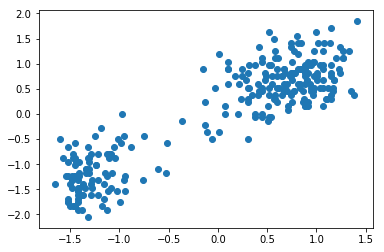

In [276]:
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data -= np.mean(data, axis = 0) #STANDART
data /= np.std(data, axis = 0)
plt.scatter(*data.T)
plt.show 

In [0]:
def get_label(pts, centroids):
  pts = pts[:,np.newaxis,:] # "Повернем" массив вокруг левой оси на 90
  bigmass = pts - centroids #центроиды "положили" и вычли из pts
  dist = np.linalg.norm(bigmass, axis = 2)
  return np.argmin(dist,axis = 1)


def get_min(pts,centroids):
  pts = pts[:,np.newaxis,:] # Повернем массив вокруг левой оси на 90
  bigmass = pts - centroids #центроиды "положили" и вычли из pts
  dist = np.linalg.norm(bigmass, axis = 2)
  return np.min(dist,axis = 1)

def get_distortion(pts,centroids):
  return np.linalg.norm(get_min(pts,centroids))

In [0]:
def my_kmeans(data, k, accuracy = 1e-05):
  centroids = np.random.uniform(min(np.min(data, axis = 0)), max(np.max(data, axis = 0)), k*data.shape[1]).reshape(k, data.shape[1])
  newCentroids = data[:k,:]
  distortion = get_distortion(data,centroids)
  labels = get_label(data, centroids)
  while(np.linalg.norm(centroids-newCentroids)> accuracy):
    distortion = get_distortion(data, centroids)
    centroids = newCentroids
    labels = get_label(data, centroids)
    newCentroids = np.array([np.mean(data[np.where(labels == i)], axis = 0) for i in range(k)])
  return newCentroids, get_distortion(data, newCentroids) 

**ДАЛЕЕ ВВЕДИТЕ КОЛИЧЕСТВО КЛАСТЕРОВ**

In [307]:
k = int(input("Input number of clasters "))
centroids, distortion = my_kmeans(data, k)
labels = get_label(data, centroids)

Input number of clasters3


**ЦЕНТРЫ КЛАССОВ ОТМЕЧЕНЫ ДРУГИМ ЦВЕТОМ, см код (Синий -> Красный и т.д))**

---



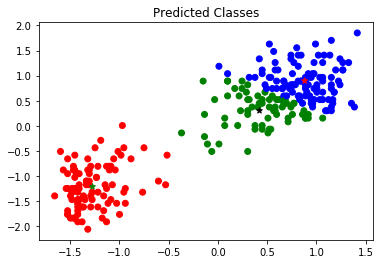

In [311]:
colors = np.array(['blue', 'red', 'green', 'black', 'yellow', 'pink']*k)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c = colors[labels[:]])
plt.scatter(*np.array(centroids).T, c = colors[1:k+1], marker='*')
plt.title('Predicted Classes')
plt.show()